In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file

## Load the training set and validation set.

In [2]:
N_FEATURES = 123

X_train, y_train = load_svmlight_file('a9a', n_features=N_FEATURES)
X_val, y_val = load_svmlight_file('a9a.t', n_features=N_FEATURES)

y_train = y_train.reshape(y_train.shape[0], 1)
y_val = y_val.reshape(y_val.shape[0], 1)
y_train


array([[-1.],
       [-1.],
       [-1.],
       ...,
       [-1.],
       [-1.],
       [ 1.]])

## Parameter

In [3]:
EPOCH_NUM = 250
BATCH_SIZE = 512
LR = 0.006
PENALTY_FACTOR = 0.6
THRESHOLD = 0
C = 0.4

## hinge loss

In [4]:
#logic function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#for output is y=±1，y^_loss is： 
# ℓ (y)=max(0,1−y⋅y^)
def loss(y_, y):
    l = np.maximum(0, 1-y*y_)
    return C * l.sum() / y.shape[0]

## Initialize SVM model parameter with normal distribution 

In [5]:
w = np.random.normal(1, 1, size=(N_FEATURES, 1))

loss_train = loss(X_train.dot(w), y_train)
loss_val = loss(X_val.dot(w), y_val)
print('loss_train: {:.4f}\tloss_val: {:.4f}'.format(loss_train, loss_val))

loss_train: 5.3166	loss_val: 5.3495


## MSGD

In [6]:
losses_train, losses_val = [], []
accs_train, accs_val = [], []

for epoch in range(EPOCH_NUM):
    for step in range(X_train.shape[0] // BATCH_SIZE):
        batch_idx = np.random.choice(X_train.shape[0], BATCH_SIZE)
        X, y = X_train[batch_idx], y_train[batch_idx]
# gradient descent      
        X_ = (1 - y * X.dot(w) < THRESHOLD)
        y_ = y.copy()
        y_[X_] = 0
        
        grad = (-1)*(X.T.dot(y_))*C + PENALTY_FACTOR*w
        grad = -grad / X.shape[0]
        
        w += LR * grad
        
    output_train, output_val = X_train.dot(w), X_val.dot(w)
    
    losses_train.append(loss(output_train, y_train))
    losses_val.append(loss(output_val, y_val))
    
# Select the appropriate threshold, mark the sample whose predict scores greater than the threshold as positive, on the contrary as negative. 

    output_train[output_train > THRESHOLD] = 1
    output_train[output_train <= THRESHOLD] = -1
    
    output_val[output_val > THRESHOLD] = 1
    output_val[output_val <= THRESHOLD] = -1
    
    accs_train.append(np.count_nonzero(output_train == y_train)/X_train.shape[0])
    accs_val.append(np.count_nonzero(output_val == y_val)/X_val.shape[0])
    
    if epoch % 15 == 0:
        print('Epoch: #{}\tLoss_train: {:.6f}\tLoss_val: {:.6f}\tAcc_train: {:.4f}\tAcc_val: {:.4f}'.format(
            epoch+1, losses_train[-1], losses_val[-1], accs_train[-1], accs_val[-1])
        )

Epoch: #1	Loss_train: 5.097484	Loss_val: 5.129169	Acc_train: 0.2408	Acc_val: 0.2362
Epoch: #16	Loss_train: 1.824295	Loss_val: 1.837047	Acc_train: 0.2684	Acc_val: 0.2644
Epoch: #31	Loss_train: 0.441974	Loss_val: 0.440392	Acc_train: 0.6600	Acc_val: 0.6637
Epoch: #46	Loss_train: 0.371622	Loss_val: 0.369286	Acc_train: 0.7181	Acc_val: 0.7167
Epoch: #61	Loss_train: 0.346812	Loss_val: 0.344514	Acc_train: 0.7345	Acc_val: 0.7323
Epoch: #76	Loss_train: 0.328144	Loss_val: 0.325918	Acc_train: 0.7449	Acc_val: 0.7417
Epoch: #91	Loss_train: 0.312968	Loss_val: 0.310648	Acc_train: 0.7520	Acc_val: 0.7504
Epoch: #106	Loss_train: 0.300388	Loss_val: 0.297956	Acc_train: 0.7581	Acc_val: 0.7582
Epoch: #121	Loss_train: 0.289767	Loss_val: 0.287154	Acc_train: 0.7635	Acc_val: 0.7633
Epoch: #136	Loss_train: 0.280571	Loss_val: 0.277742	Acc_train: 0.7685	Acc_val: 0.7686
Epoch: #151	Loss_train: 0.272364	Loss_val: 0.269426	Acc_train: 0.7725	Acc_val: 0.7732
Epoch: #166	Loss_train: 0.264992	Loss_val: 0.261965	Acc_train:

## draw graph of Lvalidation with the number of iterations.

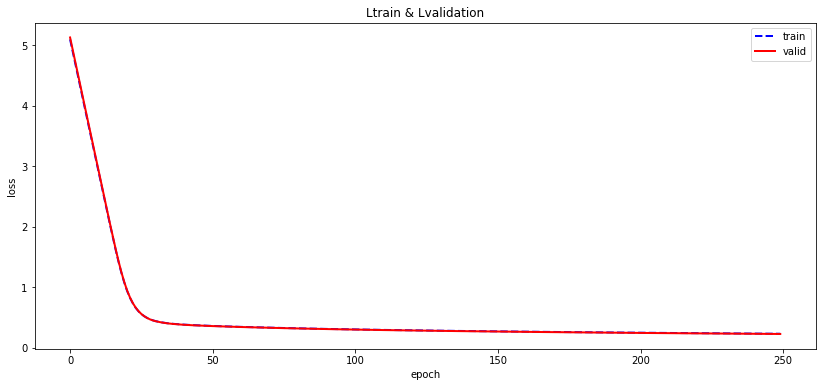

In [12]:
plt.figure(figsize=[14,6])
plt.title('Ltrain & Lvalidation')
plt.plot(losses_train, '--', c='b',linewidth=2, label='train')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(losses_val, c='r', linewidth=2, label='valid')
plt.legend()
plt.savefig('linear-classification-losses.png')
plt.show()

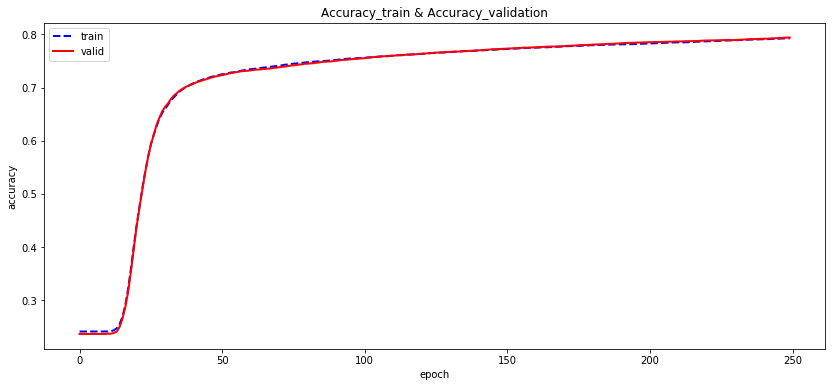

In [13]:
plt.figure(figsize=[14,6])
plt.title('Accuracy_train & Accuracy_validation')
plt.plot(accs_train, '--', c='b',linewidth=2, label='train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(accs_val, c='r', linewidth=2, label='valid')
plt.legend()
plt.savefig('linear-classification-accuracy.png')
plt.show()